In [3]:
df.index=pd.DatetimeIndex(df.Date)
df['time_hour']=df['Date'].apply(lambda x:x.hour)
df['month']=df['Date'].apply(lambda x:x.month)
df['year']=df['Date'].apply(lambda x:x.year)
df=df[df['year']!=2017]import pandas as pd
import numpy as np
import seaborn as sns
from os import path
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

In [6]:
df=pd.read_csv("C:\\Users\\sidha\\Desktop\\DMPA project\\Chicago Crime Dataset\\Chicago_Crimes_2012_to_2017.csv")

In [7]:
df.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [ ]:
df.Date=pd.to_datetime(df.Date,format='%m/%d/%Y %I:%M:%S %p')


In [13]:
df.index=pd.DatetimeIndex(df.Date)
df['time_hour']=df['Date'].apply(lambda x:x.hour)
df['month']=df['Date'].apply(lambda x:x.month)
df['year']=df['Date'].apply(lambda x:x.year)
df=df[df['year']!=2017]

In [14]:
df.head()


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,time_hour,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",23,5,2016
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",21,5,2016
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",23,5,2016
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",22,5,2016
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",22,5,2016


In [15]:
df.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,time_hour,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",23,5,2016
2016-05-03 21:40:00,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",21,5,2016
2016-05-03 23:31:00,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",23,5,2016
2016-05-03 22:10:00,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",22,5,2016
2016-05-03 22:00:00,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",22,5,2016


In [16]:
df_wordcloud = df.copy()

In [17]:
df_wordcloud.dropna(axis=0, subset=["Block"], inplace=True)

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [21]:
crime_types_location = " ".join(crime for crime in df_wordcloud["Block"])

In [24]:
#### MOnthly and Hourly Crime trend analysis

In [25]:
#to see overall crime trend by hourly periods, we can see which timings have the highest amount of crime

crimes_by_time = df.copy()

#Define our important top 10 crime types

primary_types = ["ARSON", 'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'HOMICIDE', 'ROBBERY', 'THEFT', 'WEAPONS VIOLATION', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE']



In [26]:
#Filter out rows with only the top 10 crimes mentioned above

In [28]:
crimes_by_time = crimes_by_time[crimes_by_time['Primary Type'].isin(primary_types)]

In [30]:
#Group crimes by time hour
crimes_by_time = crimes_by_time.groupby('time_hour').size().reset_index(name='No. of Crimes')

In [31]:
crimes_by_time['hours'] = crimes_by_time['time_hour'].apply(lambda x: str(x)+':00')

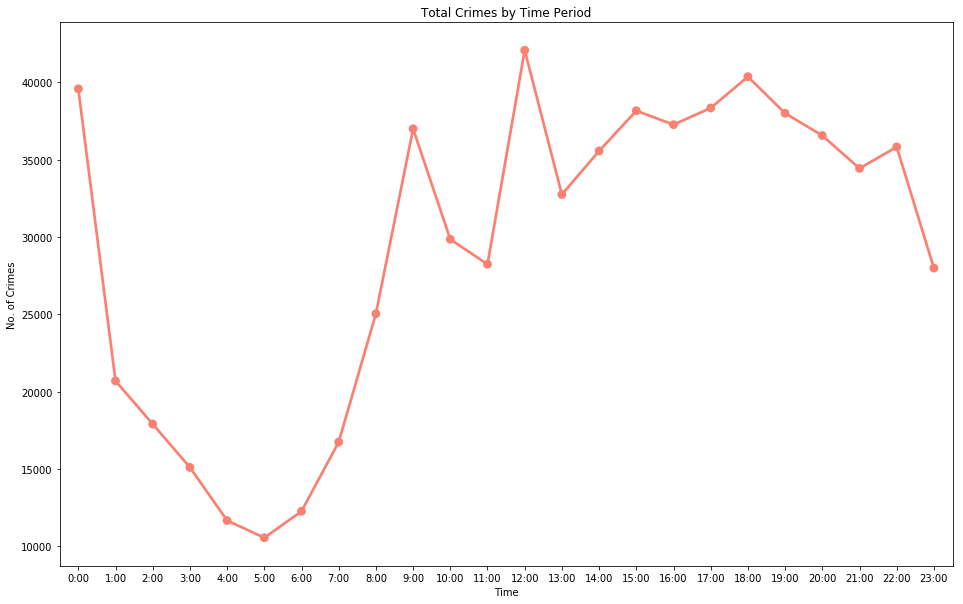

In [34]:
#plot crimes by time period
fig = plt.figure(figsize=(16, 10))
sns.pointplot(data=crimes_by_time, x="hours", y="No. of Crimes", color="salmon")

plt.xlabel('Time')
plt.ylabel('No. of Crimes')
plt.title('Total Crimes by Time Period')
plt.show()

In [39]:
#Group crimes by type
crimes_by_type = df.copy()
crimes_by_type = crimes_by_type[crimes_by_type['Primary Type'].isin(primary_types)]
crimes_by_type = crimes_by_type.groupby(['time_hour','Primary Type']).size().reset_index(name='No. of Crimes')

In [40]:
# Format hour data
crimes_by_type['hours'] = crimes_by_type['time_hour'].apply(lambda x: str(x)+':00')

In [41]:
#Create crime type pivot table
crimes_by_type_pivot = pd.pivot_table(crimes_by_type, index=['time_hour'], columns=['Primary Type'], values='No. of Crimes', aggfunc=np.sum)

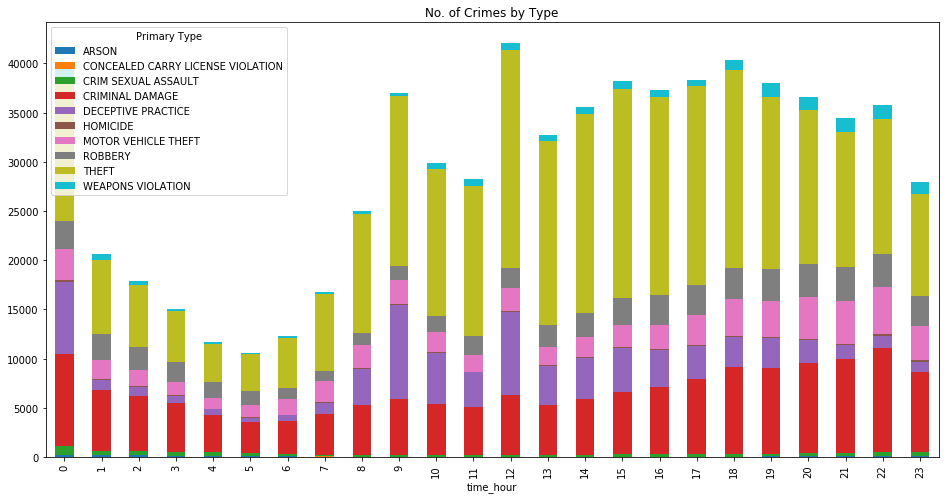

In [42]:
#Create stacked bar Chart of crime types, compared hourly
crimes_by_type_pivot.plot(kind='bar', stacked=True, figsize=(16,8), title="No. of Crimes by Type")

In [43]:
#analyze the trend for monthly crimes by grouping the same data by month.


In [44]:
#the same plot for crimes by month, group crimes by month
crimes_by_month = df.copy ()
crimes_by_month = crimes_by_month[crimes_by_month['Primary Type'].isin(primary_types)]
crimes_by_month = crimes_by_month.groupby('month').size().reset_index(name='No. of Crimes')

In [45]:
#Divide each monthly total by 5 Years to get the average crime count
crimes_by_month['month (average)'] = crimes_by_month['No. of Crimes'].apply(lambda x: x/5)

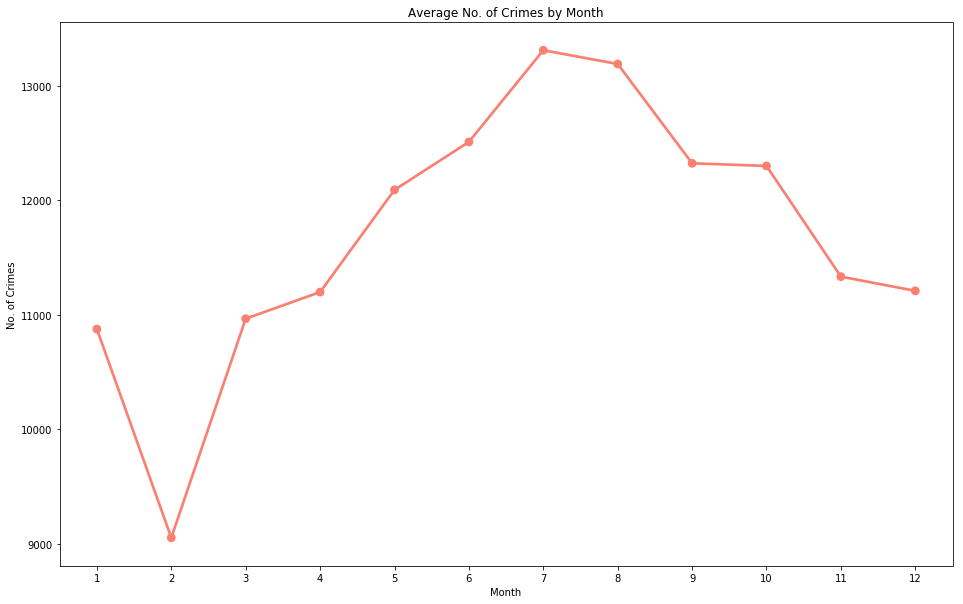

In [47]:
# Plot Crimes by month
fig = plt.figure(figsize=(16, 10))
sns.pointplot(data=crimes_by_month, x='month', y='month (average)', color="salmon")

#Set labels and title
plt.xlabel('Month')
plt.ylabel('No. of Crimes')
plt.title('Average No. of Crimes by Month')
plt.show()

In [51]:
 #will look at the major crimes based on the number of arrests.
#We extract the top 10 crimes based on type and description

# Concatenate ("Primary Type"] & ["Description") together to make a new column
df['Details'] = df['Primary Type']+','+ df['Description']

# Group by crime details and show top 10 crimes with highest arrest rates
top_crimes = df.groupby(['Details'])['Arrest'].count()
top_crimes = pd.DataFrame(top_crimes).nlargest(10, 'Arrest').reset_index()
top_crimes = list(top_crimes['Details'])
top_crimes

['THEFT,$500 AND UNDER',
 'BATTERY,DOMESTIC BATTERY SIMPLE',
 'BATTERY,SIMPLE',
 'THEFT,OVER $500',
 'CRIMINAL DAMAGE,TO VEHICLE',
 'CRIMINAL DAMAGE,TO PROPERTY',
 'ASSAULT,SIMPLE',
 'NARCOTICS,POSS: CANNABIS 30GMS OR LESS',
 'BURGLARY,FORCIBLE ENTRY',
 'MOTOR VEHICLE THEFT,AUTOMOBILE']

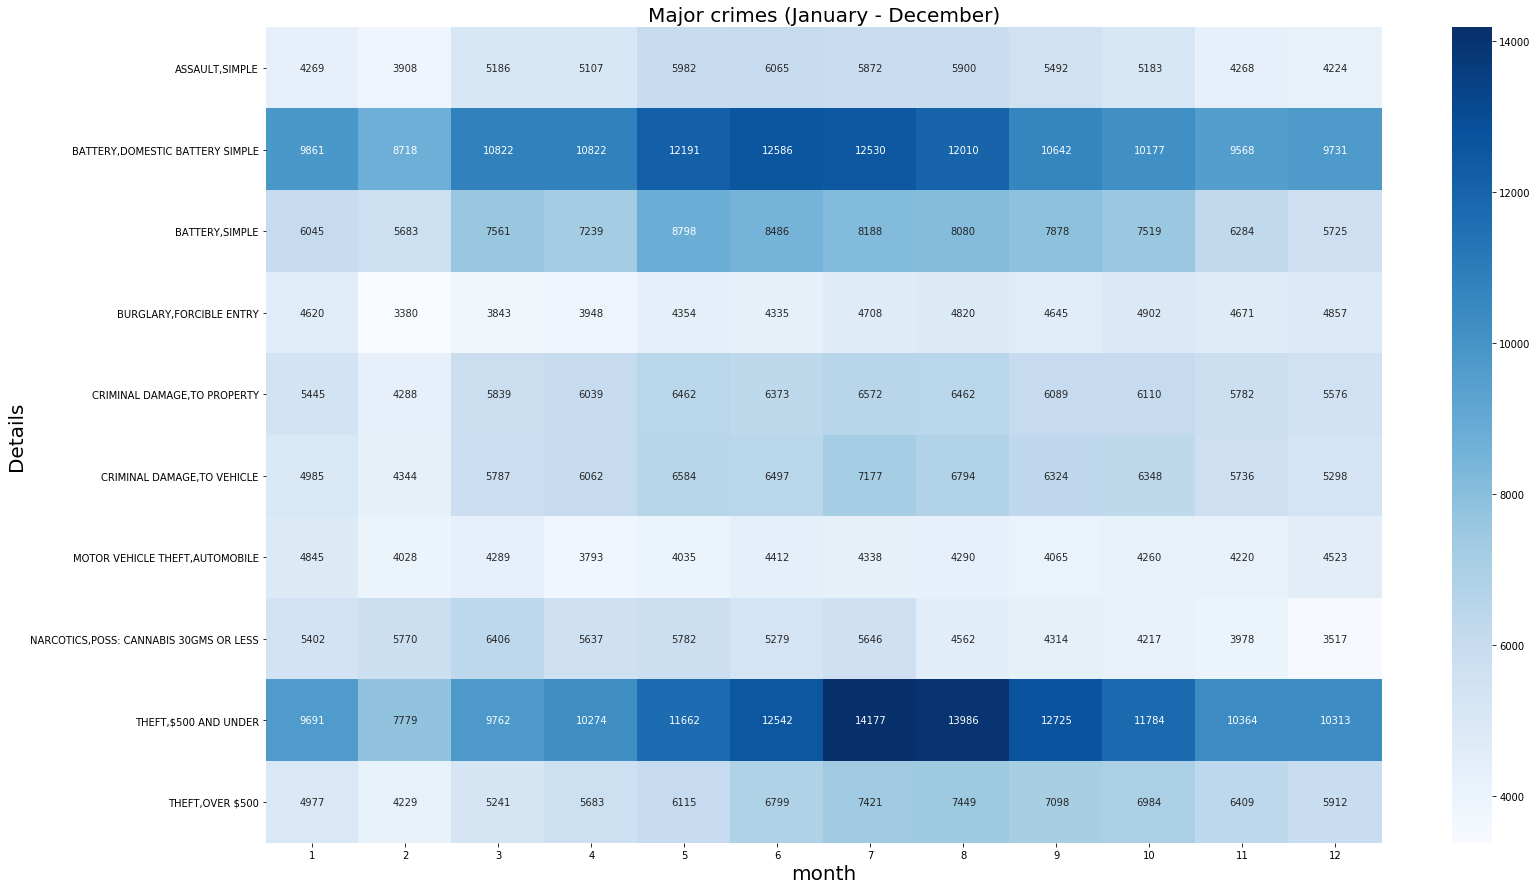

In [55]:
#now we can plot a heatmap based on top crime description and months.

df2 = df.groupby(['Details','month'])['Arrest'].count()

#Chart formatting
DIMS=(25, 15)
fig = plt.figure(figsize=DIMS)
ax1 = fig.add_subplot(111)
ax1.set_title('Major crimes (January - December)', fontsize=20)
ax1.set_ylabel ('Details', fontsize=20)
ax1.set_xlabel('month', fontsize=20)

#Get top 20 data
df2 = pd.DataFrame(df2).reset_index()
df2 = df2[df2['Details'].isin (top_crimes)]

#Pivot data to 2D table, and fill all na values
df2 = df2.pivot_table(index='Details', columns='month',values='Arrest')
df2.fillna(0, inplace=True)

#Create heatmap
sns.heatmap (df2, cmap="Blues", annot=True, fmt='g')

In [64]:
###### heat map for homicides and coordinats
da=pd.read_csv("C:\\Users\\sidha\\Desktop\\DMPA project\\Chicago Crime Dataset\\Chicago_Crimes_2012_to_2017.csv")
crime_data=da.copy()
df_homicideN = crime_data[crime_data['Primary Type']=='HOMICIDE']
df_homicideN.head()
df_homicide = df_homicideN.dropna()
keep_cols = ['Year','Date','Primary Type','Arrest','Domestic','District','Location Description',
             'FBI Code','X Coordinate','Y Coordinate','Latitude','Longitude','Location']

df_homicide = df_homicide[keep_cols].reset_index()


In [66]:

df_homicide.Date=pd.to_datetime(df_homicide.Date,format='%m/%d/%Y %I:%M:%S %p')

#pd.to_datetime(df.Date,format='%m/%d/%Y %I:%M:%S %p')
df_homicide['Year'] = df_homicide['Date'].dt.year
df_homicide['Month'] = df_homicide['Date'].dt.month
df_homicide['Day'] = df_homicide['Date'].dt.day
df_homicide['Weekday'] = df_homicide['Date'].dt.dayofweek
df_homicide['HourOfDay'] = df_homicide['Date'].dt.hour

df_homicide = df_homicide.sort_values('Date')
# print columns list and info

df_homicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2590 entries, 172 to 2589
Data columns (total 18 columns):
index                   2590 non-null int64
Year                    2590 non-null int64
Date                    2590 non-null datetime64[ns]
Primary Type            2590 non-null object
Arrest                  2590 non-null bool
Domestic                2590 non-null bool
District                2590 non-null float64
Location Description    2590 non-null object
FBI Code                2590 non-null object
X Coordinate            2590 non-null float64
Y Coordinate            2590 non-null float64
Latitude                2590 non-null float64
Longitude               2590 non-null float64
Location                2590 non-null object
Month                   2590 non-null int64
Day                     2590 non-null int64
Weekday                 2590 non-null int64
HourOfDay               2590 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(5), int64(6), object(4)
memory usa

Text(0.5, 1.0, 'HOMICIDE - ARRESTS STATS BY MONTH -- (2016-2018)')

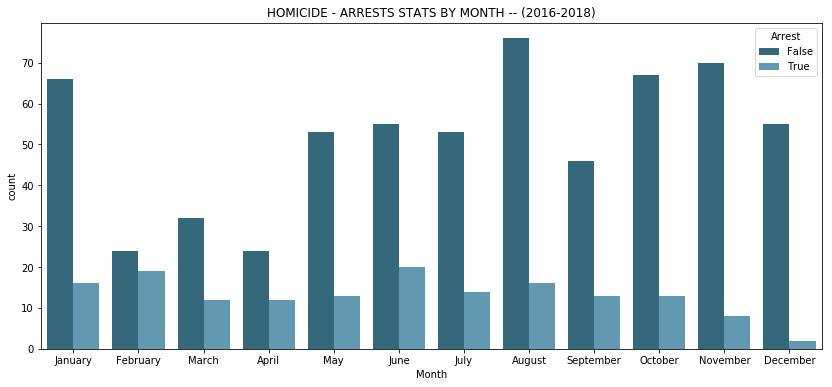

In [82]:
# create seaborn countplots for 2016 and 2017 -- high crime rate spike years
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.countplot(x="Month",
                   hue='Arrest',
                   data=df_homicide[df_homicide['Year']>=2016][['Month','Arrest']],
                   palette="PuBuGn_d")
month_nms = ['January','February','March','April','May','June','July',\
             'August','September','October','November','December']    
ax.set_xticklabels(month_nms)
plt.title('HOMICIDE - ARRESTS STATS BY MONTH -- (2016-2018)')

Text(0.5, 1.0, 'HOMICIDE - ARRESTS STATS BY YEAR')

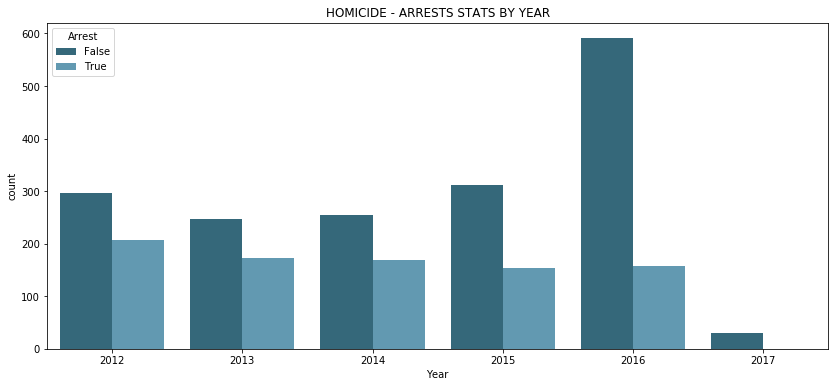

In [83]:
fig, ax = plt.subplots(figsize=(14,6))
df_arrest = df_homicide[['Year','Arrest']]
ax = sns.countplot(x="Year",
                   hue='Arrest',
                   data=df_arrest,
                   palette="PuBuGn_d")
plt.title('HOMICIDE - ARRESTS STATS BY YEAR')


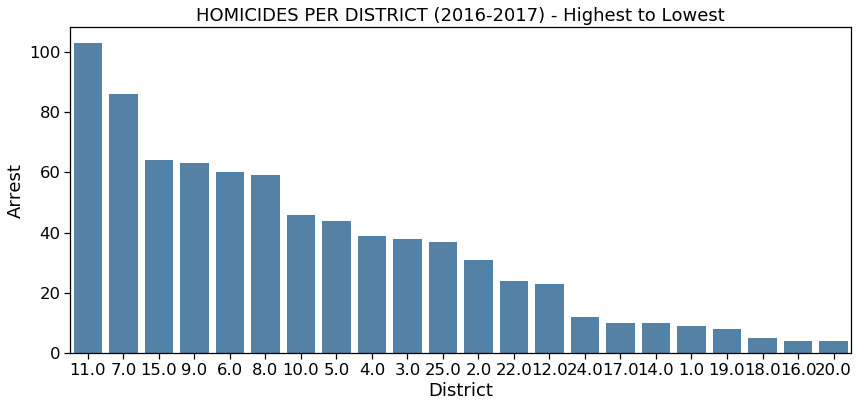

In [84]:
with sns.plotting_context('notebook',font_scale=1.5):
    sorted_homicides = df_homicide[df_homicide['Year']>=2016].groupby(['District']).count()\
                    .Arrest.reset_index().sort_values('Arrest',ascending=False)
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x='District',
                y='Arrest',
                data=sorted_homicides,
                color='steelblue',
                order = list(sorted_homicides['District']),
                label='big')
    plt.title('HOMICIDES PER DISTRICT (2016-2017) - Highest to Lowest')

In [85]:
######## clustering
sub_data = df[['Ward', 'IUCR', 'District']]
sub_data = sub_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
sub_data['IUCR'] = sub_data.IUCR.str.extract('(\d+)', expand=True).astype(int)
sub_data.head()

,Ward,IUCR,District
Date,,,
2016-05-03 23:40:00,24.0,486,10.0
2016-05-03 21:40:00,20.0,486,3.0
2016-05-03 23:31:00,37.0,470,15.0
2016-05-03 22:10:00,28.0,460,15.0
2016-05-03 22:00:00,28.0,820,15.0


In [87]:
sub_data['IUCR'] = (sub_data['IUCR'] - sub_data['IUCR'].min())/(sub_data['IUCR'].max()-sub_data['IUCR'].min())
sub_data['Ward'] = (sub_data['Ward'] - sub_data['Ward'].min())/(sub_data['Ward'].max()-sub_data['Ward'].min())
sub_data['District'] = (sub_data['District'] - sub_data['District'].min())/(sub_data['District'].max()-sub_data['District'].min())



In [88]:
km = KMeans(n_clusters=3)
km.fit(sub_data)
y = km.predict(sub_data)
labels = km.labels_
sub_data['Clusters'] = y


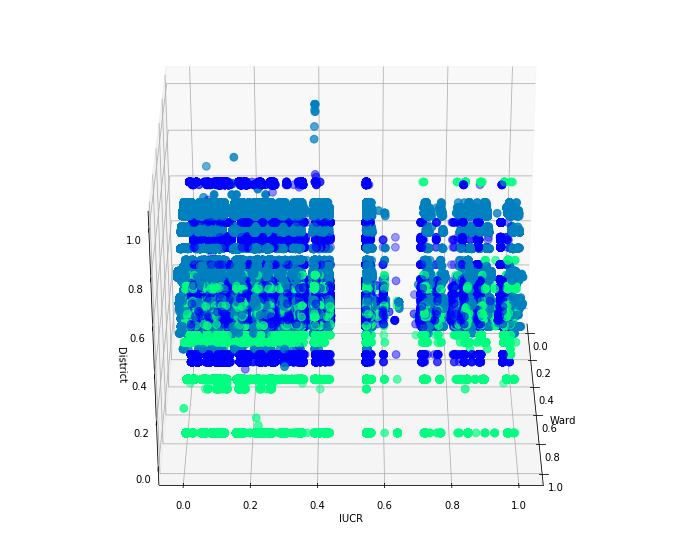

In [90]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_data['Ward'])
y = np.array(sub_data['IUCR'])
z = np.array(sub_data['District'])

ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_data["Clusters"], s=60, cmap="winter")
ax.view_init(azim=0)
#print(ax.azim)
plt.show()

In [96]:
data=pd.read_csv("C:\\Users\\sidha\\Desktop\\DMPA project\\Chicago Crime Dataset\\Chicago.csv")

In [97]:
data.drop(['X Coordinate', 'Y Coordinate', 'Updated On', 'Location', 'Beat'], axis=1, inplace=True)

In [98]:
data['Date'] = pd.to_datetime(data.Date) 
data['date'] = [d.date() for d in data['Date']]
data['time'] = [d.time() for d in data['Date']]

data['time'] = data['time'].astype(str)
empty_list = []
for timestr in data['time'].tolist():
    ftr = [3600,60,1]
    var = sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))])
    empty_list.append(var)
    
data['seconds'] = empty_list

In [121]:
sub_data = data[['Ward', 'IUCR', 'District']]
sub_data = sub_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
sub_data['IUCR'] = sub_data.IUCR.str.extract('(\d+)', expand=True).astype(int)
sub_data.head()

,Ward,IUCR,District
0,24.0,486,10.0
1,20.0,486,3.0
2,37.0,470,15.0
3,28.0,460,15.0
4,28.0,820,15.0


In [134]:
sub_data['IUCR'] = (sub_data['IUCR'] - sub_data['IUCR'].min())/(sub_data['IUCR'].max()-sub_data['IUCR'].min())
sub_data['Ward'] = (sub_data['Ward'] - sub_data['Ward'].min())/(sub_data['Ward'].max()-sub_data['Ward'].min())
sub_data['District'] = (sub_data['District'] - sub_data['District'].min())/(sub_data['District'].max()-sub_data['District'].min())

In [135]:
km = KMeans(n_clusters=3)
km.fit(sub_data)
y = km.predict(sub_data)
labels = km.labels_
sub_data['Clusters'] = y

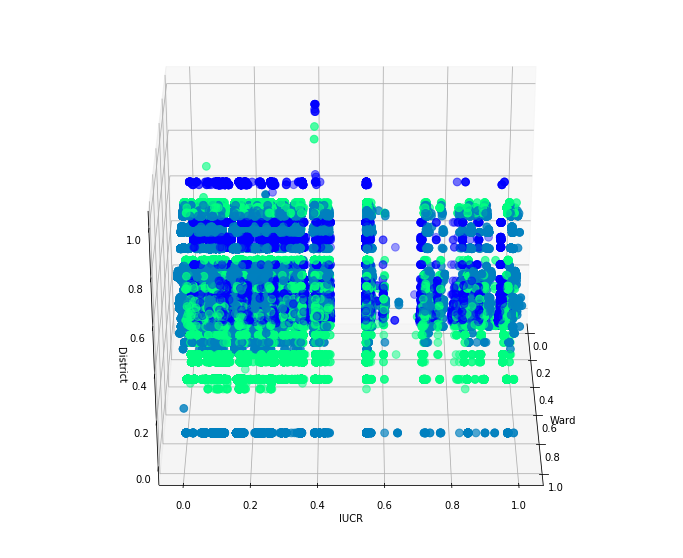

In [136]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_data['Ward'])
y = np.array(sub_data['IUCR'])
z = np.array(sub_data['District'])

ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_data["Clusters"], s=60, cmap="winter")
ax.view_init(azim=0)
#print(ax.azim)
plt.show()

In [108]:
####based on time, distinct, crime
data['Normalized_time'] = (data['seconds'] - data['seconds'].min())/(data['seconds'].max()-data['seconds'].min())

In [137]:
sub_data1 = data[['IUCR', 'Normalized_time', 'District']]
sub_data1 = sub_data1.apply(lambda x:x.fillna(x.value_counts().index[0]))
sub_data1['IUCR'] = sub_data1.IUCR.str.extract('(\d+)', expand=True).astype(int)
sub_data1['IUCR'] = (sub_data1['IUCR'] - sub_data1['IUCR'].min())/(sub_data1['IUCR'].max()-sub_data1['IUCR'].min())
sub_data1['District'] = (sub_data1['District'] - sub_data1['District'].min())/(sub_data1['District'].max()-sub_data1['District'].min())
sub_data1.head()

,IUCR,Normalized_time,District
0,0.089198,0.986796,0.300000
1,0.089198,0.903405,0.066667
2,0.086062,0.980542,0.466667
3,0.084101,0.924253,0.466667
4,0.154676,0.917304,0.466667


In [138]:
km = KMeans(n_clusters=4)
km.fit(sub_data1)
y = km.predict(sub_data1)
labels = km.labels_
sub_data1['Clusters'] = y
sub_data1.head()

,IUCR,Normalized_time,District,Clusters
0,0.089198,0.986796,0.300000,3
1,0.089198,0.903405,0.066667,3
2,0.086062,0.980542,0.466667,3
3,0.084101,0.924253,0.466667,3
4,0.154676,0.917304,0.466667,3


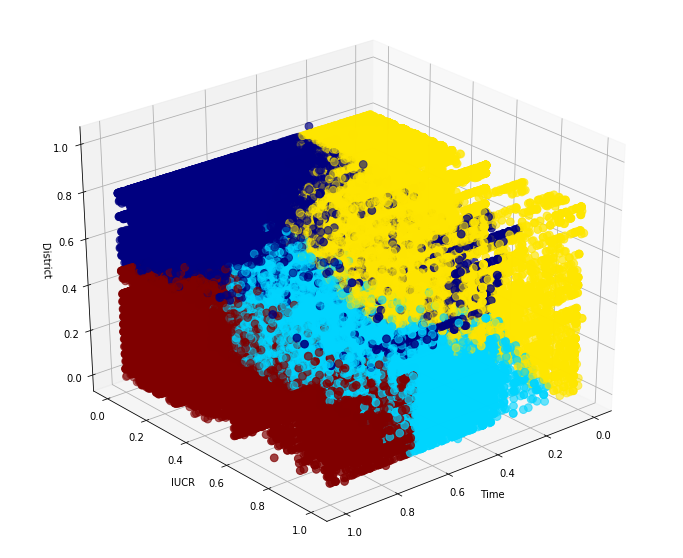

In [140]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_data1['Normalized_time'])
y = np.array(sub_data1['IUCR'])
z = np.array(sub_data1['District'])

ax.set_xlabel('Time')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="jet")
ax.view_init(azim=50)
#print(ax.azim)
plt.show()

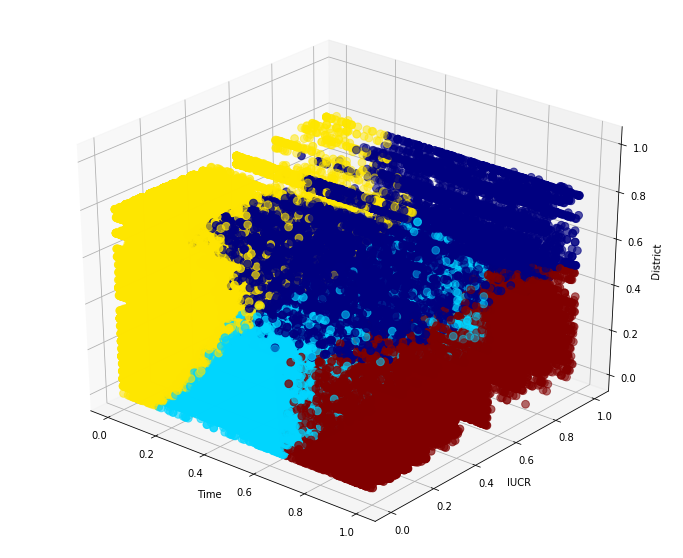

In [141]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_data1['Normalized_time'])
y = np.array(sub_data1['IUCR'])
z = np.array(sub_data1['District'])

ax.set_xlabel('Time')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="jet")
ax.view_init(azim=-50)
#print(ax.azim)
plt.show()

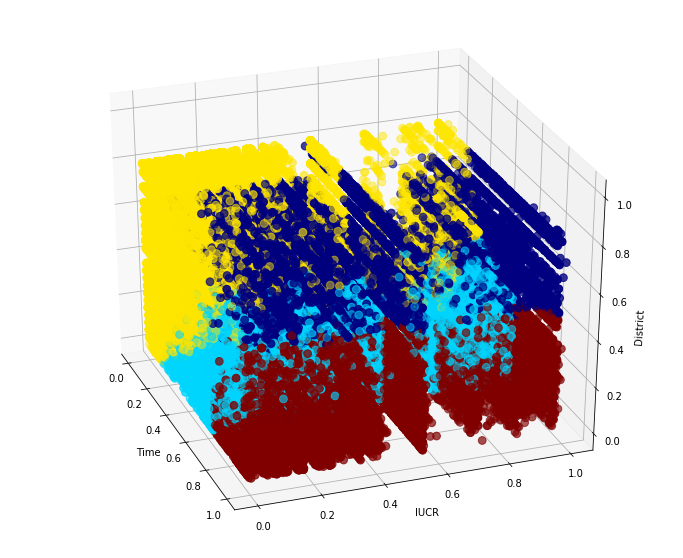

In [142]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_data1['Normalized_time'])
y = np.array(sub_data1['IUCR'])
z = np.array(sub_data1['District'])

ax.set_xlabel('Time')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="jet")
ax.view_init(azim=-20)
#print(ax.azim)
plt.show()